# Distance Moving Average

https://school.stockcharts.com/doku.php?id=technical_indicators:distance_from_ma  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data
import yfinance as yf
yf.pdr_override()

In [ ]:
# input
symbol = 'TSLA'
start = '2023-01-01'
end = '2023-09-01'

# Read data
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [ ]:
n = 14 # Number of Periods
ma = df['Adj Close'].rolling(window=n).mean()
df['DMA'] = ((df['Adj Close'] - ma) / ma) * 100

In [ ]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,DMA
Date,,,,,,,
2023-01-23,135.869995,145.380005,134.270004,143.750000,143.750000,203119200,17.172718
2023-01-24,143.000000,146.500000,141.100006,143.889999,143.889999,158699100,14.892719
2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300,13.333665
2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100,22.339513
2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,306590600,31.160142


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,DMA
Date,,,,,,,
2023-08-25,231.309998,239.000000,230.350006,238.589996,238.589996,106612200,1.748164
2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700,2.184912
2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600,9.538844
2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400,9.036117
2023-08-31,255.979996,261.179993,255.050003,258.079987,258.079987,108861700,9.026932


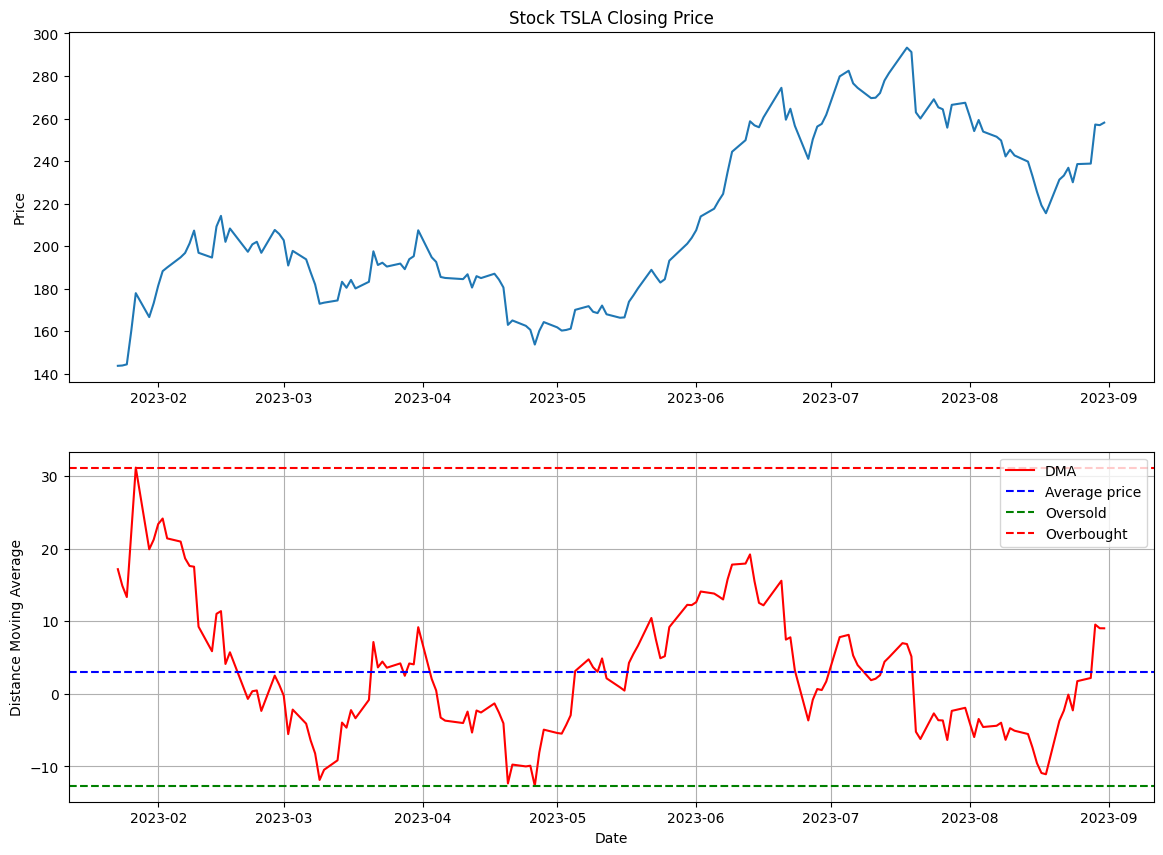

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DMA'], label='DMA', color='red')
ax2.axhline(y=df['DMA'].mean(), color='blue', label="Average price", linestyle='--')
ax2.axhline(y=df['DMA'].min(), color='green', label="Oversold", linestyle='--')
ax2.axhline(y=df['DMA'].max(), color='red', label="Overbought", linestyle='--')
ax2.grid()
ax2.set_ylabel('Distance Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

Text(0.5, 0, 'Date')

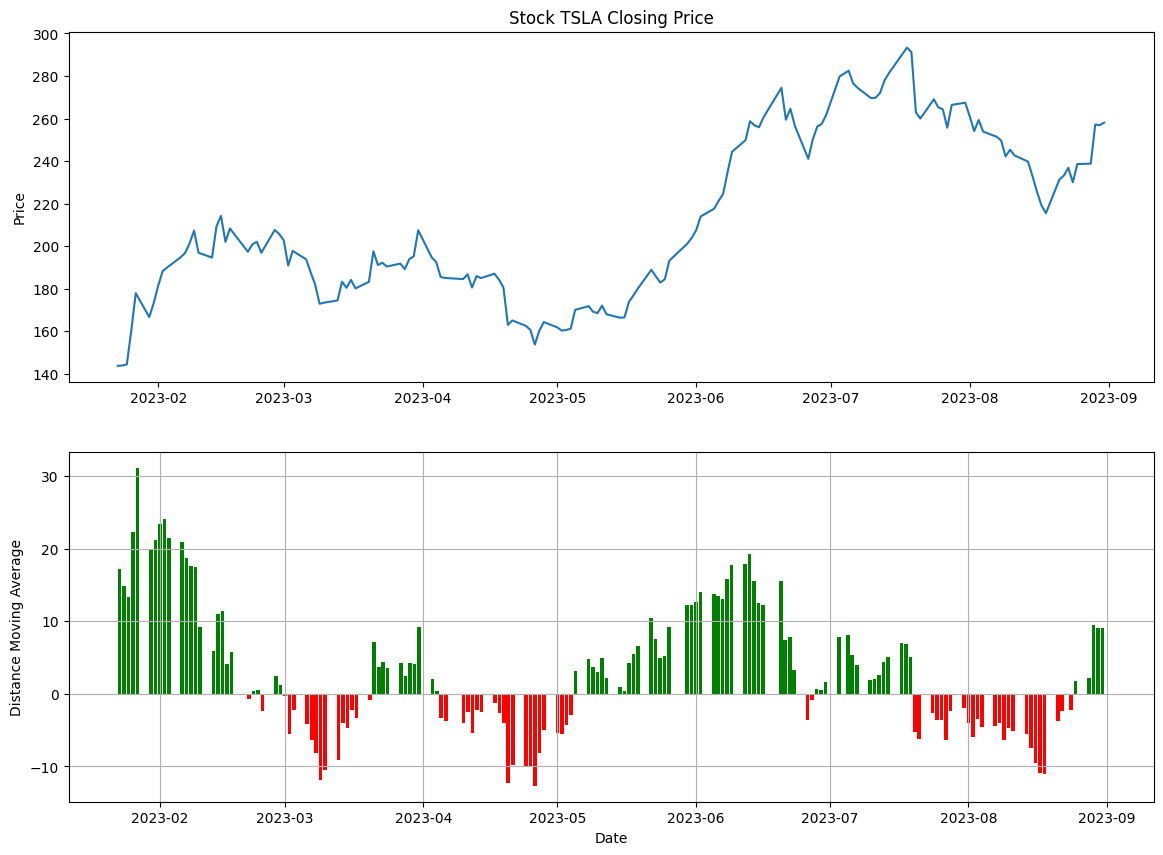

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

df['Positive'] = df['DMA'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['DMA'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Distance Moving Average')
ax2.set_xlabel('Date')

## Candlestick with Distance Moving Average

In [ ]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DMA,Positive,VolumePositive
0,19380.0,135.869995,145.380005,134.270004,143.750000,143.750000,203119200,17.172718,True,True
1,19381.0,143.000000,146.500000,141.100006,143.889999,143.889999,158699100,14.892719,True,True
2,19382.0,141.910004,146.410004,138.070007,144.429993,144.429993,192734300,13.333665,True,True
3,19383.0,159.970001,161.419998,154.759995,160.270004,160.270004,234815100,22.339513,True,True
4,19384.0,162.429993,180.679993,161.169998,177.899994,177.899994,306590600,31.160142,True,True


In [ ]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

df['Positive'] = df['DMA'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['DMA'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Distance Moving Average')
ax2.set_xlabel('Date')

ModuleNotFoundError: ignored